In [43]:
from storage import LyricsDatabase
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

## Cumulative histogram

In [4]:
db = LyricsDatabase("./lyrics/charts/")
score_count = defaultdict(int)
for song in db:
    score_count[song["success-score"]] += 1

In [5]:
max_score = max(score_count.keys())
n = 0
total = 0
for score, count in score_count.items():
    n += count
    total += score*count

print("songs:", n)
print("mean:", total/n)
print("max score:", max_score)

songs: 5184
mean: 375.603587962963
max score: 2019


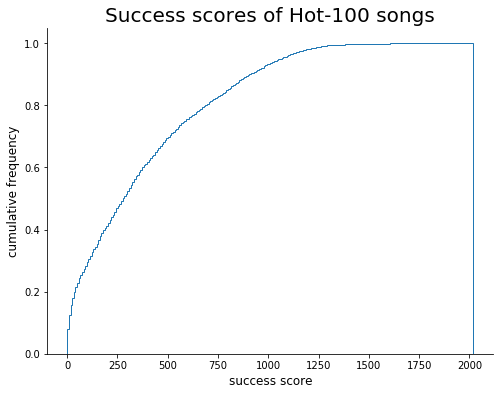

In [39]:
scores = [song["success-score"] for song in db]
plt.figure(figsize=(8,6))
plt.hist(scores, 250, histtype="step", cumulative=True, density=True)
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel("success score", fontsize=12)
plt.ylabel("cumulative frequency", fontsize=12)
plt.title("Success scores of Hot-100 songs", fontsize=20)
plt.savefig("success-scores-cumulative.png")

In [40]:
songs = [song for song in db]
songs.sort(key=lambda song: song["success-score"])

In [41]:
songs[:10]

[{'artist': 'The Radiants',
  'attempted-fetches': ['azlyrics'],
  'id': 'theradiants-fatherknowsbest',
  'lyrics': "Whenever I'm in trouble I ask my dad\nFor his advice\nAnd everything he said\nIt always seems to turn out right\n\nThat's why I talk to dad for advice\n(And I ask him)\nWhat you do to make my baby act right\n(He said son)\nAll you got to do is take my advice\nHe said to make your girl love ya\nSon, to make her kiss and hug ya\n\nYou gotta get tough\nAnd treat her wrong\nAnd if she cries, so what\nShe's trying to put you to a test\nSo watch your step and don't forget\nSon, you know your father knows best\n\nIf she gets mad and wants to ???? you\n(Here's what you say)\nNow alright baby, I don't care if you do\n(Remember son)\nThere's another girl who's waiting just for you\nHe said to make your girl love ya\nSon, to make her kiss and hug ya\n\nYou gotta get tough\nAnd treat her wrong\nAnd if she kisses someone, so what\nYour girl's no different from the rest\nShe's trying 

In [42]:
songs[-10:]

[{'artist': 'Sly & The Family Stone',
  'attempted-fetches': ['azlyrics'],
  'id': 'slythefamilystone-everydaypeople',
  'lyrics': "Sometimes I'm right and I can be wrong\nMy own beliefs are in my song\nThe butcher, the banker, the drummer and then\nMakes no difference what group I'm in\nI am everyday people, yeah, yeah\n\nThere is a blue one\nWho can't accept the green one\nFor living with a fat one\nTrying to be a skinny one\nDifferent strokes\nFor different folks\n\nAnd so on and so on\nAnd scooby dooby dooby\nOh sha sha\nWe got to live together\n\nI am no better and neither are you\nWe are the same, whatever we do\nYou love me, you hate me, you know me and then\nYou can't figure out the bag I'm in\nI am everyday people, yeah yeah\n\nThere is a long hair\nThat doesn't like the short hair\nFor being such a rich one\nThat will not help the poor one\nDifferent strokes\nFor different folks\n\nAnd so on and so on\nAnd scooby dooby dooby\nOh sha sha\nWe got to live together\n\nThere is a 

## Box plots

In [45]:
STEMMER = PorterStemmer()
YOU_FORMS = [STEMMER.stem(form) for form in ["you", "your", "yours", "yourself"]]

def lowercase_stems(s):
    return [STEMMER.stem(token).lower() for token in word_tokenize(s)]

def contains_you(lyrics):
    return any(stem in YOU_FORMS for stem in lowercase_stems(lyrics))

def contains_you_in_first_line(lyrics):
    return contains_you(lyrics.strip().split("\n")[0])

In [49]:
song1 = """I love you
Because you are lovely"""
song2 = """This song is not addressed
To the 2nd person"""
song3 = """2nd person,
Is on the second line, your goose"""
for song in [song1, song2, song3]:
    print(contains_you(song))
    print(contains_you_in_first_line(song))

True
True
False
False
True
False


In [54]:
db = LyricsDatabase("./lyrics/charts/")
songs = [song for song in db]
you_scores = [song["success-score"] for song in songs
              if contains_you(song["lyrics"])]
not_you_scores = [song["success-score"] for song in songs
              if not contains_you(song["lyrics"])]
you_first_line_scores = [
    song["success-score"]
    for song in songs
    if contains_you_in_first_line(song["lyrics"])
]
not_you_first_line_scores = [
    song["success-score"]
    for song in songs
    if not contains_you_in_first_line(song["lyrics"])
]

In [56]:
for scores in [you_scores, not_you_scores, you_first_line_scores, not_you_first_line_scores]:
    # mean & median
    print(
        sum(scores)/len(scores),
        sorted(scores)[len(scores)//2])

373.45530236634534 278
391.4177419354839 316
384.43767705382436 302
372.2966595970307 276


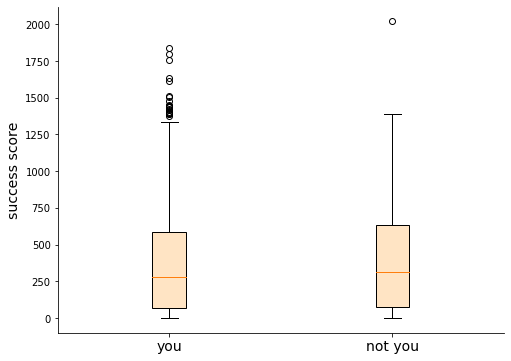

4564 620


In [73]:
plt.figure(figsize=(8,6))
box = plt.boxplot([you_scores, not_you_scores], patch_artist=True)
colors = ['bisque', 'bisque']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
ax = plt.gca()
ax.set_xticklabels(["you", "not you"], fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel("success score", fontsize=14)
plt.show()
print(len(you_scores), len(not_you_scores))

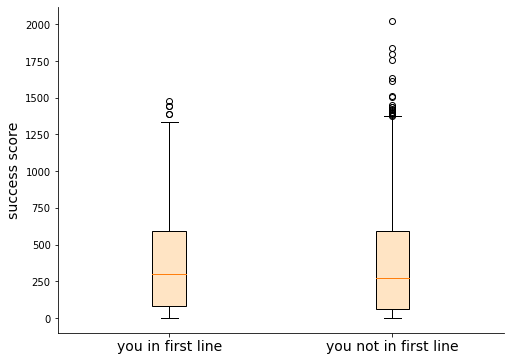

1412 3772


In [72]:
plt.figure(figsize=(8,6))
box = plt.boxplot(
    [you_first_line_scores, not_you_first_line_scores],
    patch_artist=True)
colors = ['bisque', 'bisque']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
ax = plt.gca()
ax.set_xticklabels(["you in first line", "you not in first line"], fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel("success score", fontsize=14)
plt.show()
print(len(you_first_line_scores), len(not_you_first_line_scores))